In [1]:
import pandas as pd

df = pd.read_csv("NYC_taxi_fares.csv")

In [2]:
# check what we're working with
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
1048570,05:00.0,7.0,2014-09-13 17:05:00 UTC,-73.962580,40.778222,-73.973827,40.764247,4
1048571,48:25.0,8.9,2012-02-04 18:48:25 UTC,-73.990152,40.740837,-73.995193,40.760206,4
1048572,16:00.0,6.9,2012-06-22 19:16:00 UTC,-73.963888,40.767992,-73.974017,40.751570,1
1048573,12:00.0,12.0,2014-01-10 19:12:00 UTC,-73.972328,40.745277,-73.987682,40.739162,1


In [3]:
# checks for null values in whole dataset
print(df.isnull().values.any())

# checks columns to check if they have null values
print(df['dropoff_longitude'].isnull().values.any())
print(df['dropoff_latitude'].isnull().values.any())

True
True


In [4]:
# im using dropna() to drop null values and setting it to df
df = df.dropna()

In [5]:
# reset index after dropping column
df = df.reset_index()

In [6]:
# 
def euc_distance(lat1, long1, lat2, long2):
    return (((lat1 - lat2) ** 2 + (long1 - long2) ** 2) ** 0.5)

In [7]:
# 
df["distance"] = euc_distance(df["pickup_latitude"], df["pickup_longitude"], df["dropoff_latitude"], df["dropoff_longitude"])

In [8]:
df

,index,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.009436
1,1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,0.079696
2,2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.013674
3,3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,0.025340
4,4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,0.019470
...,...,...,...,...,...,...,...,...,...,...
1048560,1048570,05:00.0,7.0,2014-09-13 17:05:00 UTC,-73.962580,40.778222,-73.973827,40.764247,4,0.017939
1048561,1048571,48:25.0,8.9,2012-02-04 18:48:25 UTC,-73.990152,40.740837,-73.995193,40.760206,4,0.020014
1048562,1048572,16:00.0,6.9,2012-06-22 19:16:00 UTC,-73.963888,40.767992,-73.974017,40.751570,1,0.019295
1048563,1048573,12:00.0,12.0,2014-01-10 19:12:00 UTC,-73.972328,40.745277,-73.987682,40.739162,1,0.016527


In [10]:
from tensorflow import keras
from tensorflow.keras import layers

# Define the number of features
num_features = 6

# Define the model
model = keras.Sequential([
    layers.Input(shape=(num_features,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # No activation for regression
])


In [11]:
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [12]:
from sklearn.model_selection import train_test_split

# Drop columns that aren't features
X = df.drop(columns=['index', 'key', 'fare_amount', 'pickup_datetime'])
y = df['fare_amount']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# train model and set it to history variable
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), batch_size=32)

Epoch 1/30
26215/26215 [==============================] - 57s 2ms/step - loss: 79.3574 - mae: 3.8237 - val_loss: 38.4180 - val_mae: 2.4088
Epoch 2/30
26215/26215 [==============================] - 54s 2ms/step - loss: 53.2397 - mae: 2.7282 - val_loss: 33.2017 - val_mae: 2.5828
Epoch 3/30
26215/26215 [==============================] - 54s 2ms/step - loss: 48.1243 - mae: 2.7081 - val_loss: 31.9735 - val_mae: 2.5559
Epoch 4/30
26215/26215 [==============================] - 54s 2ms/step - loss: 31.7784 - mae: 2.6762 - val_loss: 31.1395 - val_mae: 2.5510
Epoch 5/30
26215/26215 [==============================] - 55s 2ms/step - loss: 29.9347 - mae: 2.6624 - val_loss: 29.6459 - val_mae: 2.5860
Epoch 6/30
26215/26215 [==============================] - 55s 2ms/step - loss: 30.8639 - mae: 2.6468 - val_loss: 28.2163 - val_mae: 2.7895
Epoch 7/30
26215/26215 [==============================] - 54s 2ms/step - loss: 30.4821 - mae: 2.6393 - val_loss: 28.3290 - val_mae: 2.3959
Epoch 8/30
26215/26215 [===

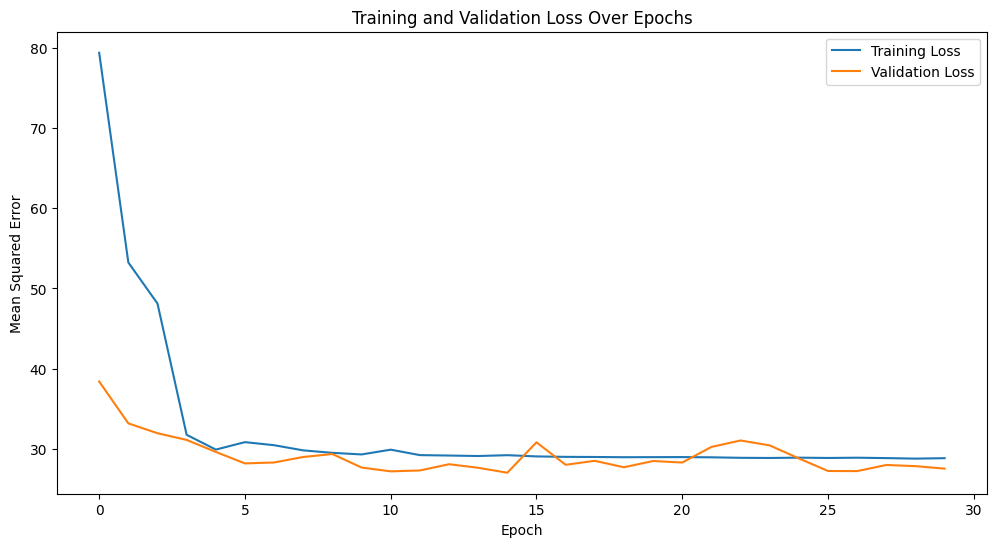

In [14]:
import matplotlib.pyplot as plt

# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()
